In [23]:
load('.RData')

In [24]:
## Eliminar Mouse 3484
df <- df[df$Mouse != 3484, ]
df.c_s <- df[df$Genotype == 'Control' & df$Treatment == 'Saline', c('Behavior', proteinas)]
head(df.c_s)

,Behavior,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3477_1,CS,0.5916184,0.8149799,0.4149799,2.706108,5.256264,0.2609897,0.1872492,4.163798,0.2658939,⋯,0.3161974,1.598026,1.903538,0.1279904,1.1052226,0.7147052,0.2162696,0.1211552,0.4000481,1.399615
3477_2,CS,0.5898067,0.8404449,0.4243253,2.803702,5.534373,0.2694201,0.1928337,4.284555,0.2759847,⋯,0.3231917,1.597113,1.987210,0.1458747,1.0931156,0.7302941,0.2206288,0.1253331,0.3988663,1.410978
3477_3,CS,0.5989016,0.8860412,0.4447597,2.918261,5.717712,0.2904348,0.1971625,4.497666,0.2822883,⋯,0.3040895,1.521701,1.851042,0.1418094,0.9987003,0.6903867,0.2306085,0.1186000,0.3787309,1.332266
3477_4,CS,0.5448436,0.7269988,0.3908459,2.521089,4.967323,0.2755504,0.1909618,4.576825,0.2402086,⋯,0.3019977,1.516816,1.951827,0.1225187,1.0786446,0.7160197,0.2107093,0.1177140,0.3855102,1.394424
3477_5,CS,0.5127852,0.7306502,0.3891756,2.514047,5.070519,0.2718725,0.1886252,4.548217,0.2383901,⋯,0.3260649,1.527257,1.942254,0.1370436,1.0477307,0.7195740,0.2228068,0.1242394,0.3857759,1.366823
3477_6,CS,0.5421644,0.7804849,0.4145476,2.672383,5.691898,0.2835009,0.1986990,4.806978,0.2560615,⋯,0.3139563,1.436650,1.886165,0.1348908,1.0755461,0.7015170,0.2353155,0.1170510,0.3673544,1.320328


In [25]:
library(ropls)
library(ggplot2)
library(HotellingEllipse)
library(ggforce)
library(ggpubr)
library(plotly)
library(ggrepel)
library(scales)

PLS-DA
251 samples x 65 variables and 1 response
pareto scaling of predictors and standard scaling of response(s)
      R2X(cum) R2Y(cum) Q2(cum)  RMSEE pre ort pR2Y  pQ2
Total    0.883    0.986   0.975 0.0603  10   0 0.05 0.05


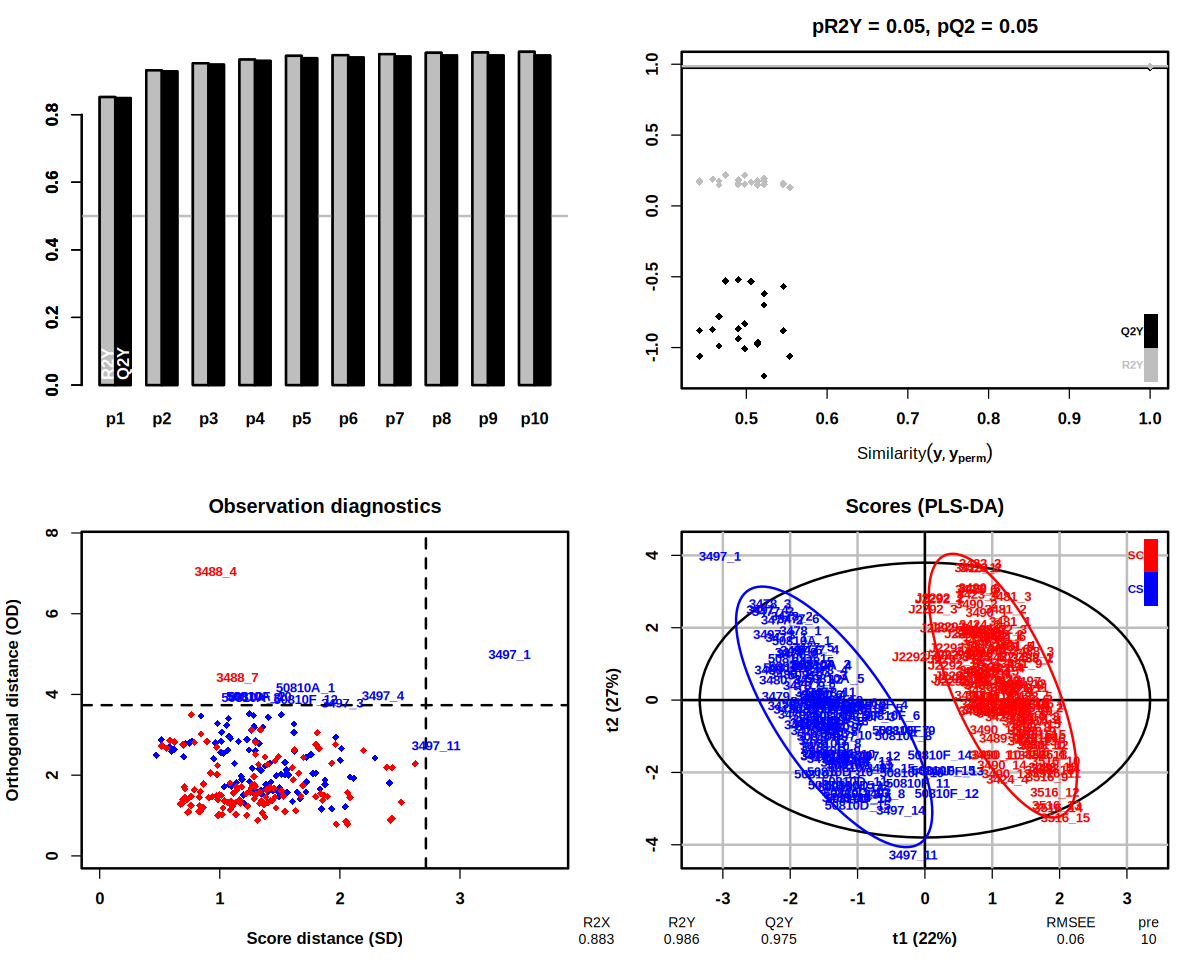

In [34]:
res.plsda <- opls(df.c_s[, 6:70], df.c_s$Behavior, scaleC = 'pareto', predI = 10)

In [35]:
scores <- getScoreMN(res.plsda)
loadings <- getLoadingMN(res.plsda)

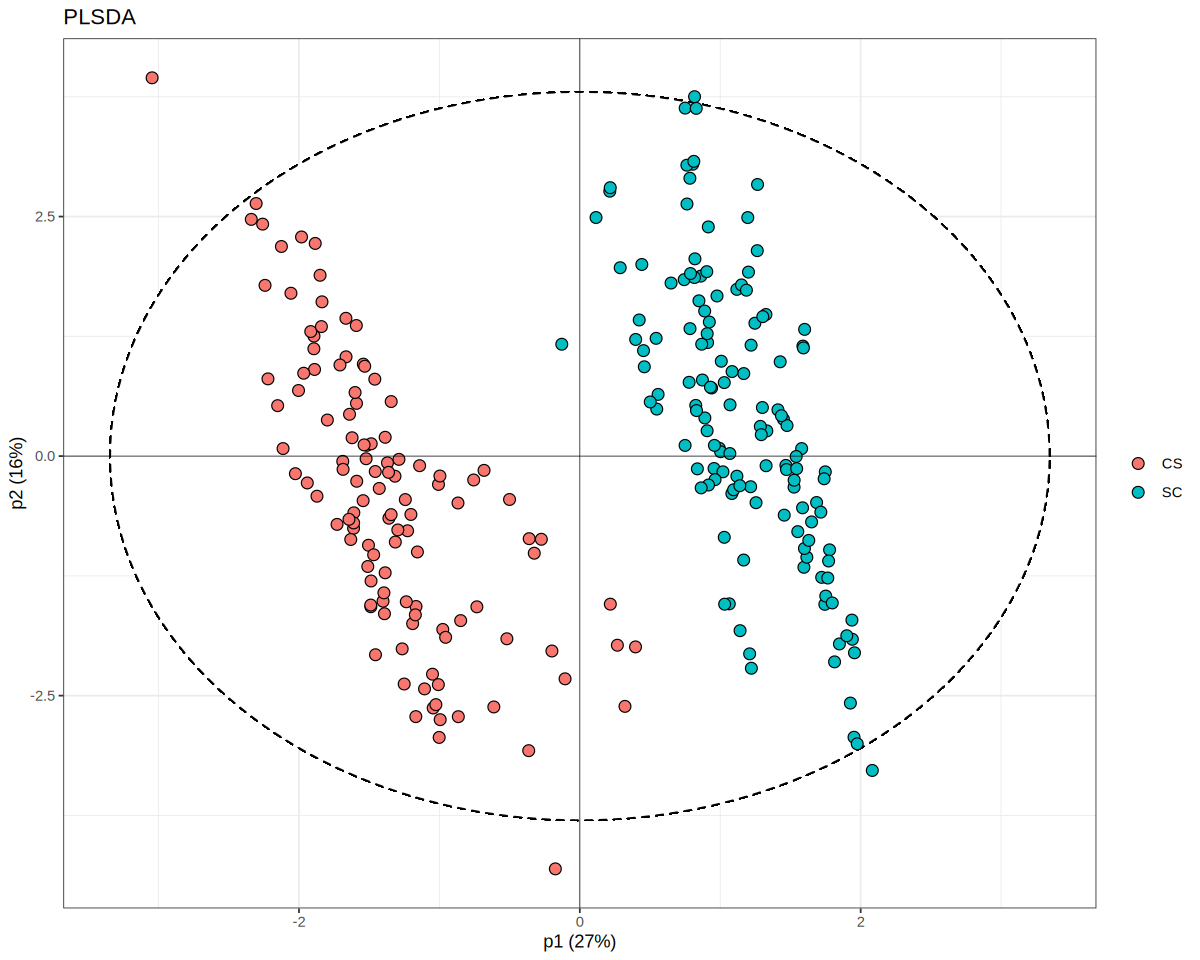

In [38]:
createPLSDAPlot <- function(pc1, pc2){
  ### Numeros de los principales componentes a mostrar pc1, pc2
  res_2PCs <- ellipseParam(data = as.data.frame(scores), k = 2, pcx = pc1, pcy = pc2)
  a <- res_2PCs$Ellipse$a.95pct
  b <- res_2PCs$Ellipse$b.95pct
  T2 <- res_2PCs$Tsquare$value
    
  comp1 <- paste0('p', pc1)
  comp2 <- paste0('p', pc2)
  r2x1 <- round(res.pca@modelDF[pc1,1], 2) * 100
  r2x2 <- round(res.pca@modelDF[pc2,1], 2) * 100
  
  p1 <- ggplot(as.data.frame(scores), aes(x = !!sym(comp1), y = !!sym(comp2))) +
    geom_ellipse(aes(x0 = 0, y0 = 0, a = a, b = b, angle = 0), linewidth = .5, 
                 linetype = "dashed", fill = "white") +
    geom_point(aes(fill = df.c_s$Behavior), shape = 21, size = 3, color = 'black') +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_vline(xintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    #geom_text_repel(aes(label = rownames(scores)), size = 3, color = 'red') + 
    theme_bw() + 
    theme(legend.position = 'right', legend.title = element_blank()) +
    labs(title = 'PLSDA') +
    xlab(paste0(comp1, ' (', r2x1, '%)')) + 
    ylab(paste0(comp2, ' (', r2x2, '%)'))
  
  p1
  
}

createPLSDAPlot(1, 2)

Warning message:
“ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


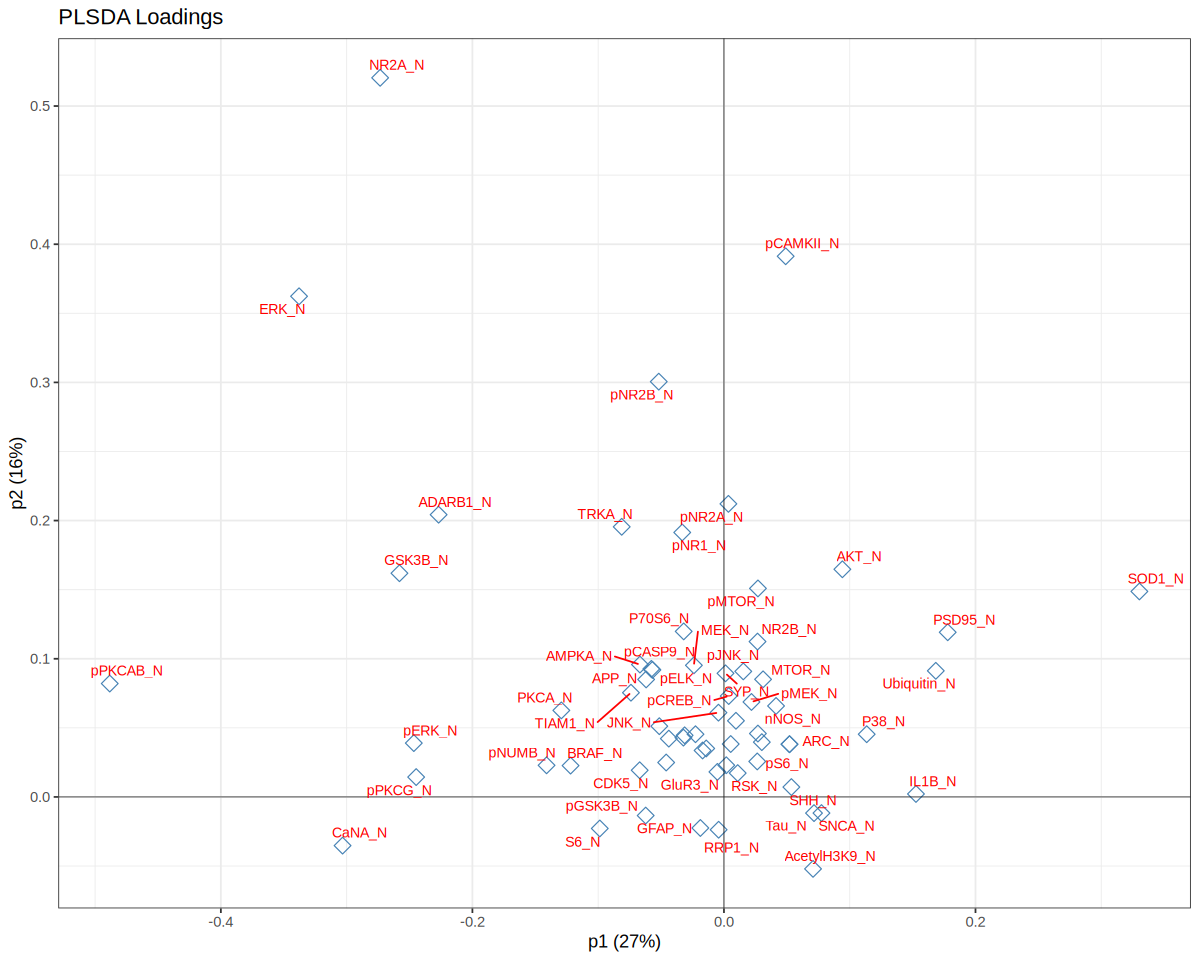

In [39]:
createPLSDALoading <- function(pc1, pc2){
  comp1 <- paste0('p', pc1)
  comp2 <- paste0('p', pc2)
  r2x1 <- round(res.pca@modelDF[pc1,1], 2) * 100
  r2x2 <- round(res.pca@modelDF[pc2,1], 2) * 100
  
  p1 <- ggplot(as.data.frame(loadings), aes(x = !!sym(comp1), y = !!sym(comp2))) +
    geom_point(shape = 5, color = 'steelblue', size = 3) +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_vline(xintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_text_repel(aes(label = rownames(loadings)), size = 3, color = 'red') +
    theme_bw() + 
    theme(legend.position = 'top') +
    labs(title = 'PLSDA Loadings') +
    xlab(paste0(comp1, ' (', r2x1, '%)')) + 
    ylab(paste0(comp2, ' (', r2x2, '%)'))
  
  p1
  
}


createPLSDALoading(1, 2)

# OPLSDA

OPLS-DA
251 samples x 65 variables and 1 response
pareto scaling of predictors and standard scaling of response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.651    0.963    0.96 0.097   1   3 0.05 0.05


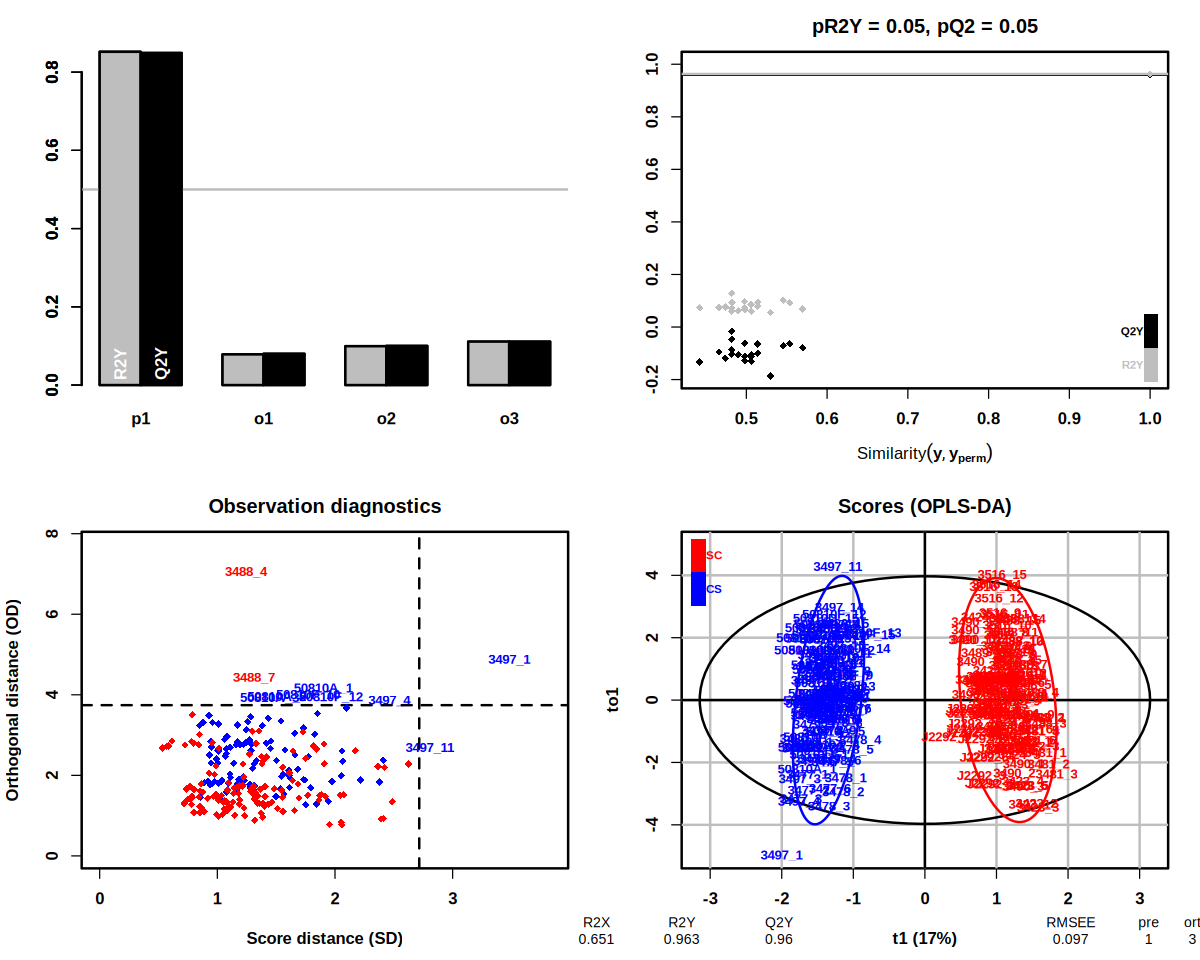

In [40]:
res.oplsda <- opls(df.c_s[, 6:70], df.c_s$Behavior, scaleC = 'pareto', predI = 1, orthoI = NA)

In [52]:
scores <- getScoreMN(res.oplsda)
scores <- cbind(scores, res.oplsda@orthoScoreMN)
loadings <- getLoadingMN(res.oplsda)
loadings <- cbind(loadings, res.oplsda@orthoLoadingMN)

In [53]:
head(scores)
head(loadings)

,p1,o1,o2,o3
3477_1,-1.643278,-2.407913,0.4717992,0.3444443
3477_2,-1.625785,-2.919264,0.6522347,0.3508209
3477_3,-1.735183,-3.198667,0.9823768,0.2326944
3477_4,-1.260819,-1.910737,0.1815019,0.4492402
3477_5,-1.295982,-2.011615,0.1853421,0.3797891
3477_6,-1.329322,-2.868351,0.4730809,0.2111525


,p1,o1,o2,o3
NR2A_N,-0.11431591,-0.54343805,0.240684974,-0.17111023
pAKT_N,0.03049144,-0.03542169,0.083471425,0.08718427
pBRAF_N,0.03337764,-0.02895866,0.081614118,0.05638136
pCAMKII_N,0.15696514,-0.34639591,-0.003453809,0.62120548
pCREB_N,0.01604180,-0.06594831,0.086692859,0.08283130
pELK_N,-0.03391347,-0.09808550,0.354377812,-0.56726690


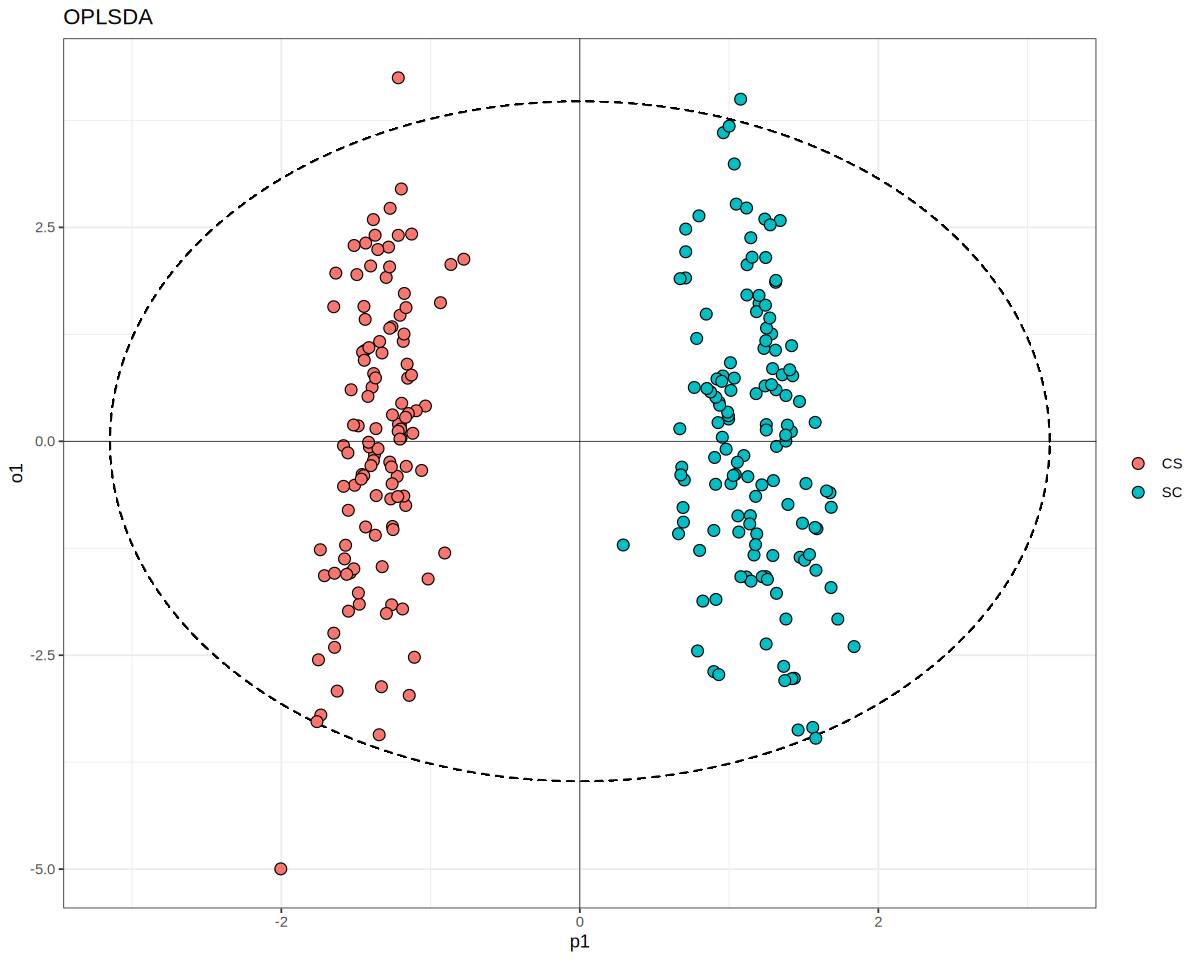

In [54]:
 res_2PCs <- ellipseParam(data = as.data.frame(scores), k = 2, pcx = 1, pcy = 2)
  a <- res_2PCs$Ellipse$a.95pct
  b <- res_2PCs$Ellipse$b.95pct
  T2 <- res_2PCs$Tsquare$value

  
  p1 <- ggplot(as.data.frame(scores), aes(x = p1, y = o1)) +
    geom_ellipse(aes(x0 = 0, y0 = 0, a = a, b = b, angle = 0), linewidth = .5, 
                 linetype = "dashed", fill = "white") +
    geom_point(aes(fill = df.c_s$Behavior), shape = 21, size = 3, color = 'black') +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_vline(xintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    #geom_text_repel(aes(label = rownames(scores)), size = 3, color = 'red') + 
    theme_bw() + 
    theme(legend.position = 'right', legend.title = element_blank()) +
    labs(title = 'OPLSDA') 
  
  p1
  

Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


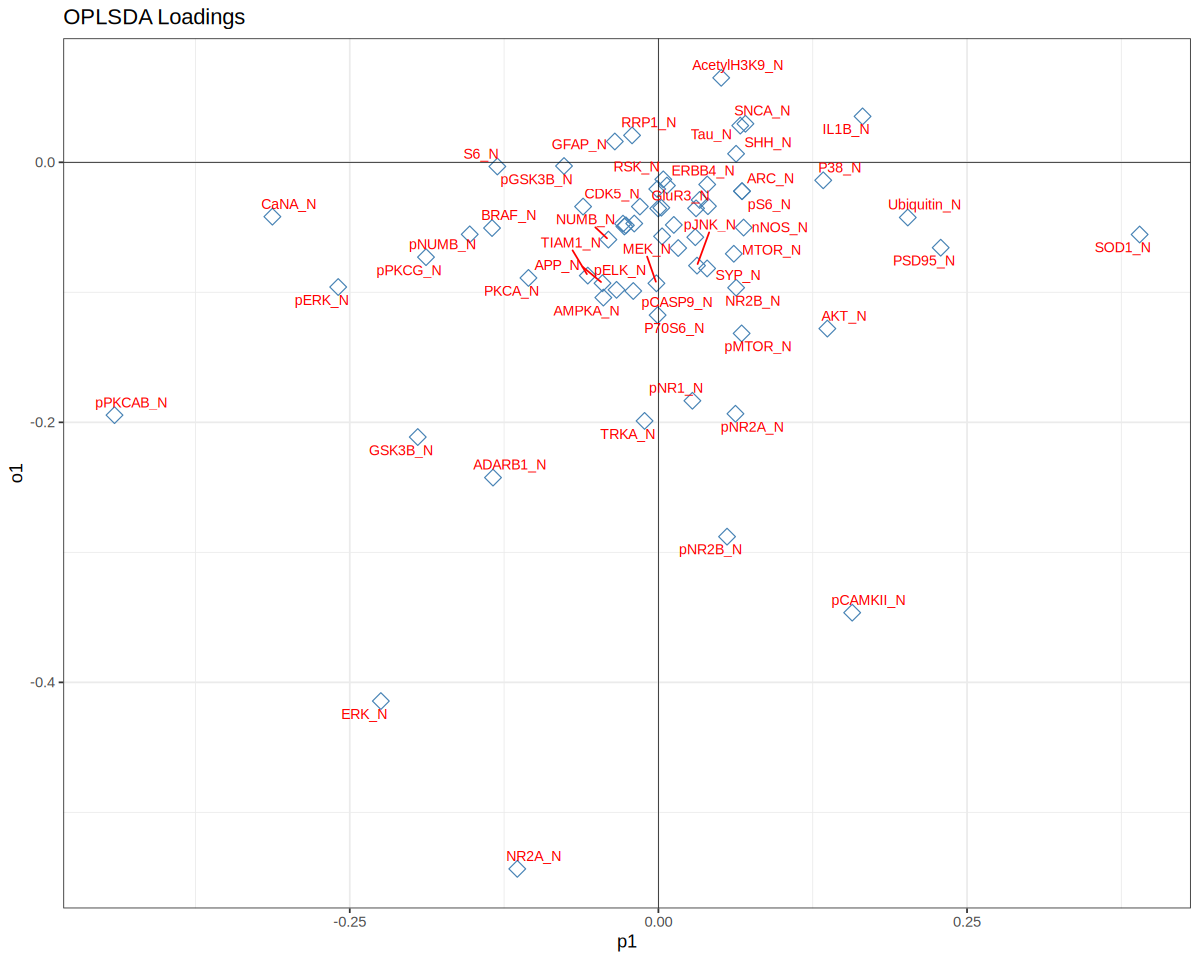

In [55]:
  p1 <- ggplot(as.data.frame(loadings), aes(x = p1, y = o1)) +
    geom_point(shape = 5, color = 'steelblue', size = 3) +
    geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_vline(xintercept = 0, linetype = "solid", color = "black", linewidth = .2) +
    geom_text_repel(aes(label = rownames(loadings)), size = 3, color = 'red') +
    theme_bw() + 
    theme(legend.position = 'top') +
    labs(title = 'OPLSDA Loadings')
  
  p1

In [56]:

############################
#######    S-PLOT ##########
############################
DataSplot <- function(datamatrix, opls) {

  s <- datamatrix
  T <- as.matrix(opls@scoreMN)

  p1 <- c()
  for (i in 1:ncol(s)) {
    scov <- cov(s[,i], T) 
    p1 <- matrix(c(p1, scov), ncol=1)
  }
  
    
  pcorr1 <- c()
  for (i in 1:nrow(p1)) {
    den <- apply(T, 2, sd)*sd(s[,i])
    corr1 <- p1[i,]/den
    pcorr1 <- matrix(c(pcorr1, corr1), ncol=1)
  }

  datasplot <- data.frame(Cov = p1, Corr = pcorr1)
  rownames(datasplot) <- colnames(datamatrix)

  return(datasplot)
}
     

In [69]:
df_splot <- DataSplot(res.oplsda@suppLs$xModelMN, res.oplsda)
vip <- data.frame(vip = getVipVn(res.oplsda))
df_splot <- cbind(df_splot, vip)

In [70]:
head(df_splot)
head(vip)

,Cov,Corr,vip
,<dbl>,<dbl>,<dbl>
NR2A_N,-0.18588311,-0.15055938,0.9211430
pAKT_N,0.04958053,0.18840805,0.2456961
pBRAF_N,0.05427363,0.25262441,0.2689527
pCAMKII_N,0.25523280,0.21949476,1.2648051
pCREB_N,0.02608473,0.10905079,0.1292628
pELK_N,-0.05514492,-0.06220856,0.2732704


,vip
,<dbl>
NR2A_N,0.9211430
pAKT_N,0.2456961
pBRAF_N,0.2689527
pCAMKII_N,1.2648051
pCREB_N,0.1292628
pELK_N,0.2732704


In [76]:


df_splot$Selected <- 0
df_splot$Selected <- ifelse(df_splot$vip > 1, 1, 0)
head(df_splot)

,Cov,Corr,vip,Selected
,<dbl>,<dbl>,<dbl>,<dbl>
NR2A_N,-0.18588311,-0.15055938,0.9211430,0
pAKT_N,0.04958053,0.18840805,0.2456961,0
pBRAF_N,0.05427363,0.25262441,0.2689527,0
pCAMKII_N,0.25523280,0.21949476,1.2648051,1
pCREB_N,0.02608473,0.10905079,0.1292628,0
pELK_N,-0.05514492,-0.06220856,0.2732704,0


Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


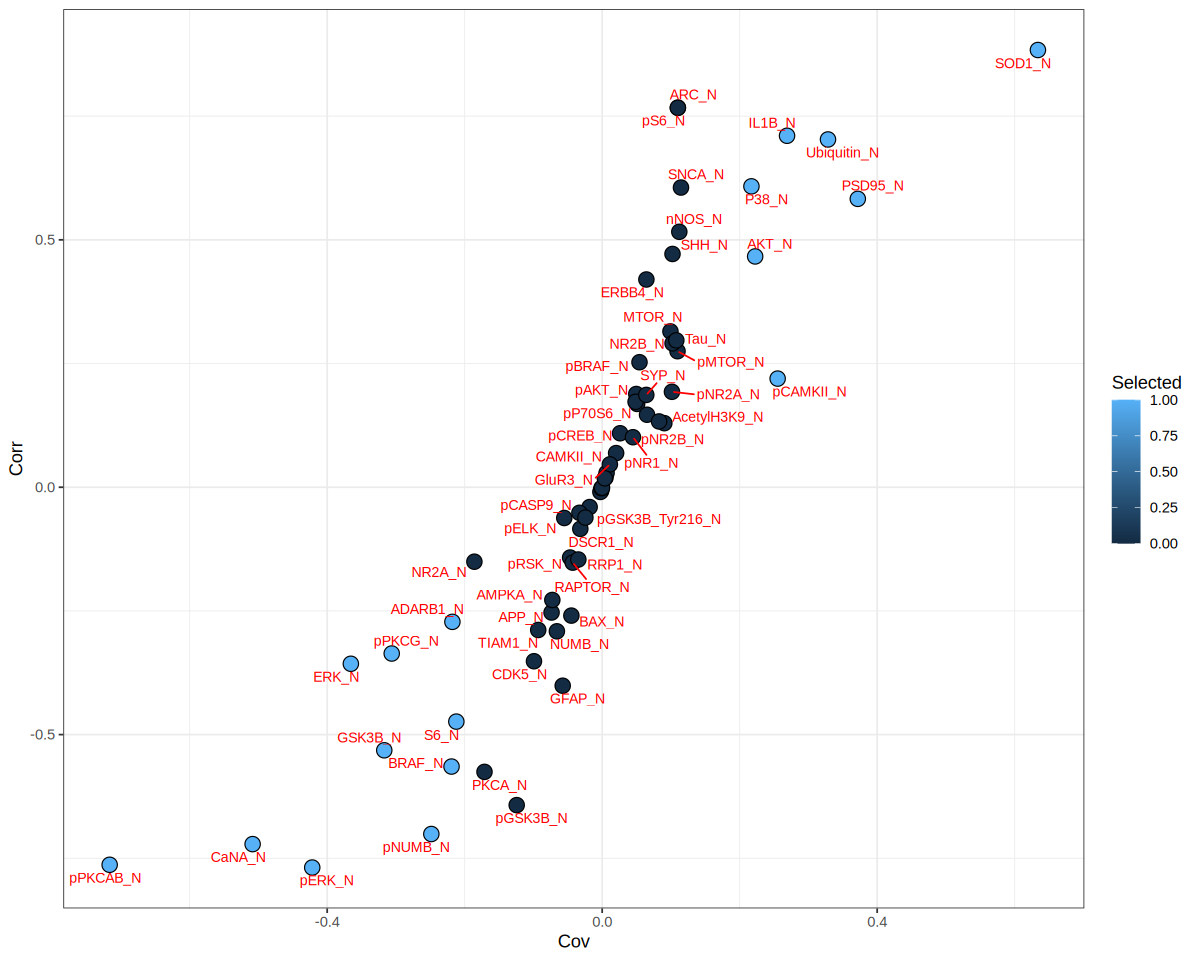

In [79]:

    ggplot(df_splot, aes(x = Cov, y = Corr)) +
        geom_point(aes(fill = Selected), shape = 21, color = 'black', size = 4) +
        geom_text_repel(aes(label = rownames(loadings)), size = 3, color = 'red') +
        theme_bw()

character(0)